In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [4]:
img=cv2.imread("img.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

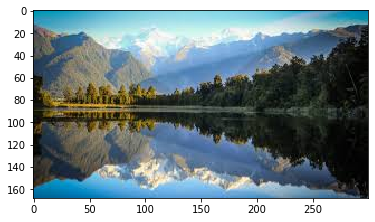

In [5]:
plt.imshow(img)
plt.show()

In [6]:
img.shape

(168, 300, 3)

In [7]:
all_pixels=img.reshape((-1,3))

In [8]:
all_pixels.shape

(50400, 3)

In [9]:
from sklearn.cluster import KMeans

In [28]:
k=3
km=KMeans(n_clusters=k)

In [29]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
km.cluster_centers_

array([[ 95.73593481, 123.63323408, 138.41022828],
       [ 34.0567867 ,  37.83374372,  31.57427927],
       [163.44265919, 204.49409164, 219.12173765]])

In [31]:
centers=np.array(km.cluster_centers_,dtype="uint")

In [32]:
centers

array([[ 95, 123, 138],
       [ 34,  37,  31],
       [163, 204, 219]], dtype=uint32)

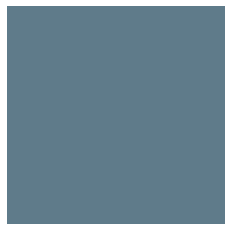

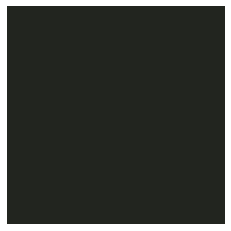

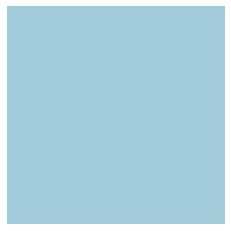

In [33]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [34]:
km.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [35]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [36]:
new_img.shape


(50400, 3)

In [37]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [38]:
new_img


array([[ 95, 123, 138],
       [ 95, 123, 138],
       [ 95, 123, 138],
       ...,
       [ 34,  37,  31],
       [ 34,  37,  31],
       [ 95, 123, 138]], dtype=uint32)

In [39]:
new_img.shape

(50400, 3)

In [40]:
new_img = new_img.reshape((168, 300,3))


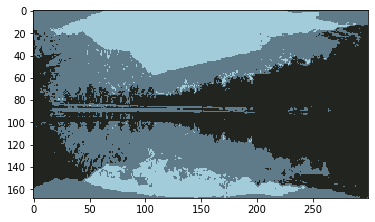

In [41]:
plt.imshow(new_img)
plt.show()